In [110]:
# Import requrired libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, ElasticNet, Lasso
from sklearn.model_selection import GridSearchCV
import pickle

### Data Preparation

In [3]:
# Read the dataset
df = pd.read_csv("C:/Users/ndhu2/Desktop/Term_3/5_Neural Networks and Deep Learning/Algerian_forest_fires_cleaned.csv")
display(df)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [54]:
# Descriptive Statistics
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [4]:
# Identify unique values
# Iterate through each column in the DataFrame
for column in df.columns:
    # Get the unique values for the current column
    unique_values = df[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values for {column}:")
    print(unique_values)
    print("\n")

Unique values for day:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


Unique values for month:
[6 7 8 9]


Unique values for year:
[2012]


Unique values for Temperature:
[29 26 25 27 31 33 30 28 32 34 35 36 37 22 24 38 39 40 42]


Unique values for RH:
[57 61 82 89 77 67 54 73 88 79 65 81 84 78 80 55 62 66 64 53 47 50 68 75
 76 63 69 70 59 48 45 60 51 52 58 86 74 71 49 44 41 42 90 87 72 46 37 36
 56 43 83 29 34 33 35 39 31 21 40 24 38 26]


Unique values for Ws:
[18 13 22 16 14 15 12 19 21 20 17 26 11 10  9  8  6 29]


Unique values for Rain:
[ 0.   1.3 13.1  2.5  0.2  1.2  0.5  3.1  0.7  0.6  0.3  0.1  0.4  1.
  1.4  0.8 16.8  7.2 10.1  3.8  0.9  1.8  4.6  8.3  5.8  4.   2.   4.7
  8.7  4.5  1.1  1.7  2.2  6.   1.9  2.9  4.1  6.5  4.4]


Unique values for FFMC:
[65.7 64.4 47.1 28.6 64.8 82.6 88.2 86.6 52.9 73.2 84.5 84.  50.  59.
 49.4 36.1 37.3 56.9 79.9 59.8 81.  79.1 81.4 85.9 86.7 86.8 89.  89.1
 88.7 59.9 55.7 63.1 80.1 87.  80.

In [28]:
# Display data types of each column
print(df.dtypes)

"""
Features:
- Day
- Month
- year
- Temperature
- RH = Relative Humidity
- Ws = Wind Speed
- Rain
- FFMC = Fine Fuel Moisture Code
- DMC = Duff Moisture Code
- DC = Drought Code
- ISI = Initial Spread Index
- BUI = Buildup Index
- FWI = Fire Weather Index
- Classes
- Region
"""

"""
Independent Variables: Temperature, Humidity, Wind Speed
Dependent Variable: Fire Intensity -> FWI
"""

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object


'\nIndependent Variables: Temperature, Humidity, Wind Speed\nDependent Variable: Fire Intensity -> FWI\n'

In [18]:
# Identify missing values
missing_values = df.isna()
# Show the sum of missing values
print(missing_values.sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


d:\Users\ndhu2\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


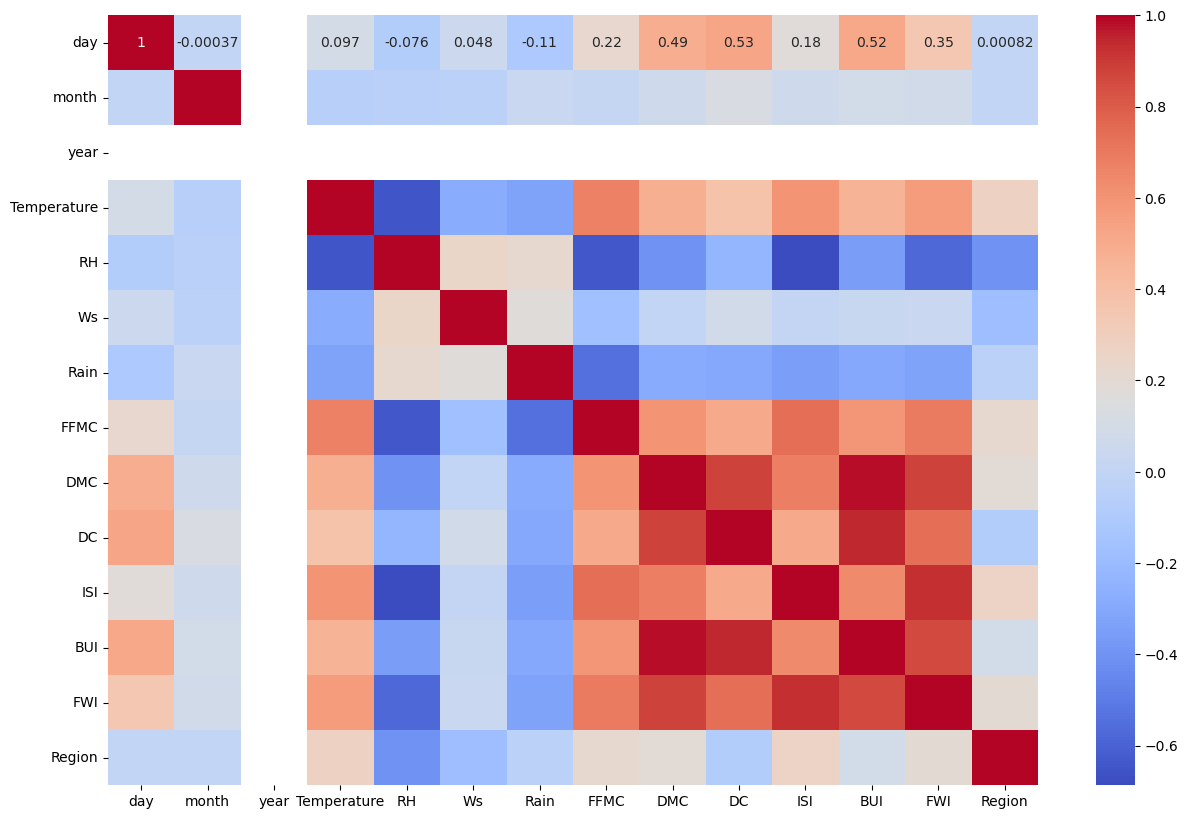

In [104]:
# Correlation Matrix

# Calculate the correlation matrix
df_num = df.drop(columns="Classes")

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df_num.corr(), cmap="coolwarm", annot=True)
plt.show()

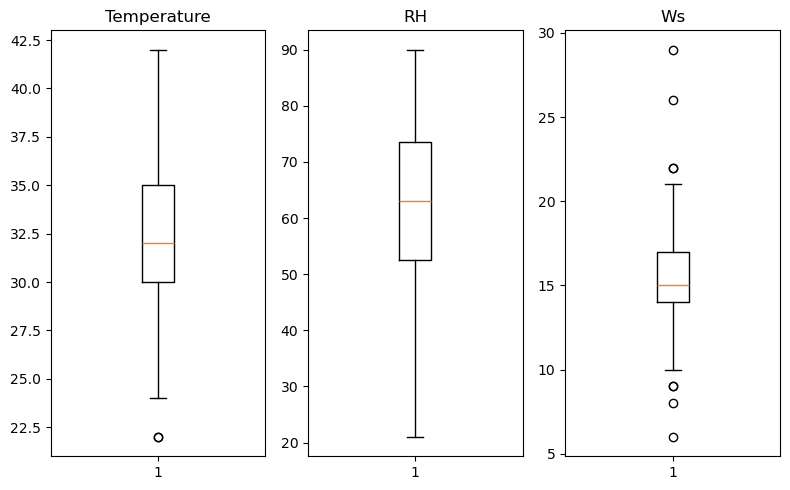

In [33]:
# Identify outliers

df_inputs = df[["Temperature","RH","Ws"]]
# Create boxplots for all the independent variables to visualize 
plt.figure(figsize=(8, 5))  # Set the figure size

# Loop through each column in the DataFrame
for i, col in enumerate(df_inputs):
    plt.subplot(1, 3, i + 1)  # Create subplots
    plt.boxplot(df_inputs[col])  # Create boxplot for the current feature
    plt.title(col)  # Set the title as the column name

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()  # Show the plot

In [43]:
# Remove outliers
# Calculate interquartile range (IQR)
Q1 = df_inputs.quantile(0.25)
Q3 = df_inputs.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
outliers = (df_inputs < (Q1 - 1.5 * IQR)) | (df_inputs > (Q3 + 1.5 * IQR))
records_with_outliers = outliers.any(axis=1)

# Remove records with outliers
df_clean = df[~records_with_outliers]


In [48]:
# Split dataset into training and test
X = df_clean[["Temperature","RH","Ws"]]
y = df_clean["FWI"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Standarization of data
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [62]:
print("Shape of X_train:", X_train_st.shape)
print("Shape of X_test:", X_test_st.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (187, 3)
Shape of X_test: (47, 3)
Shape of y_train: (187,)
Shape of y_test: (47,)


### Model Training

In [68]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_st, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_st)

# Make predictions on the test set
y_test_pred = model.predict(X_test_st)



### Model Evaluation

In [69]:
# Evaluate the model using mean squared error (MSE), mean absolute arror (MAE), and R2
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training MAE:", train_mae)
print("Test MAE:", test_mae)
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

Training MSE: 26.589224394251914
Test MSE: 46.48102143150516
Training MAE: 4.06011347159016
Test MAE: 5.506805528736258
Training R-squared: 0.5057942612949781
Test R-squared: 0.19809485459170117


In [111]:
# Perform hyperparameter tuning to improve the model's performance
# Define Ridge Regression model
ridge = Ridge()

# Define hyperparameters grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_st, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
ridge_model = grid_search.best_estimator_

# Evaluate the best model
ridge_model.fit(X_train_st, y_train)
y_train_pred = ridge_model.predict(X_train_st)
y_test_pred = ridge_model.predict(X_test_st)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training MAE:", train_mae)
print("Test MAE:", test_mae)
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

Best hyperparameters: {'alpha': 10}
Training MSE: 26.630136551272674
Test MSE: 46.2421886809667
Training MAE: 4.0474522352624485
Test MAE: 5.503019178768308
Training R-squared: 0.5050338396112666
Test R-squared: 0.20221527203629275


In [106]:
# Define Lasso Regression model
lasso = Lasso()

# Define hyperparameters grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_st, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_train_pred = best_model.predict(X_train_st)
y_test_pred = best_model.predict(X_test_st)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training MAE:", train_mae)
print("Test MAE:", test_mae)
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

Best hyperparameters: {'alpha': 0.01}
Training MSE: 26.589489701965288
Test MSE: 46.46450058696985
Training MAE: 4.058848713676159
Test MAE: 5.506313846593549
Training R-squared: 0.505789330102081
Test R-squared: 0.1983798773780201


In [107]:
# Define ElasticNet Regression model
elastic_net = ElasticNet()

# Define hyperparameters grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}  # L1_ratio controls the balance between L1 and L2 regularization

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_st, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_train_pred = best_model.predict(X_train_st)
y_test_pred = best_model.predict(X_test_st)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training MAE:", train_mae)
print("Test MAE:", test_mae)
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

Best hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Training MSE: 26.590584759478865
Test MSE: 46.43415496685694
Training MAE: 4.057390340252131
Test MAE: 5.506057233448287
Training R-squared: 0.505768976604762
Test R-squared: 0.19890340952425334


The three previous models present a considerable overfitting, having a poor performance with the test dataset in comparison with the training dataset. The evaluation metrics indicate that the model's predictive perfomance is not optimal and there is room for improvement, which could be achieved by adding features with a high or strong correlation with the output.

### Pickling the Model

In [112]:
# Save the model as a pickle file
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge_model, open('ridge_model.pkl', 'wb'))

Pickling a model allows the user to preserve the model's parameters and attributes, enabling easy reuse and deployment of the model without the need for retraining. 
Some key benefits of pickling a model include persistence, portability, and enabling offline deployment in environments with limited internet connectivity.
In conclusion, pickling provides a convenient and efficient way to save, store, and reuse trained machine learning models in various applications and environments.

### Prediction on Unseen Data

In [114]:
# Load the pickle files
with open('ridge_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaling_model = pickle.load(f)

In [115]:
# Scale the unseen records of the input variables
X_test_st = scaling_model.transform(X_test)

In [117]:
# Make predictions on the unseen data
predictions = loaded_model.predict(X_test_st)

In [118]:
# Evaluate the performance of the model
y_test_pred = best_model.predict(X_test_st)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test MSE:", test_mse)
print("Test MAE:", test_mae)
print("Test R-squared:", test_r2)

Test MSE: 46.2421886809667
Test MAE: 5.503019178768308
Test R-squared: 0.20221527203629275


### Conclusion

From these results we can observe that the mean absolute error (MAE) of 5.503 indicates that, on average, the predicted FWI values are vary by approximately 5.503 units from the actual values. The R-squared value of 0.202 indicates that approximately 20.2% of the variance in the FWI values is explained by the features included in the model. This suggests that the model captures a modest portion of the variability in FWI, indicating that there is still room for improvement.

In conclusion, the performance metrics indicate that there is room for improvement in terms of accuracy and explanatory power. A good approach to improve the overall performance of the model would be including additional independent variables with a strong correlation value with the output variable. Another possible approach would be implementing different models to compare their performance.
